In [1]:
import fastbook
fastbook.setup_book()

In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
audio_types = 'forged','true'
path = Path("./data")

In [4]:
fns = get_image_files(path)
fns

(#17856) [Path('data/true/newampvol0_0_recording_61001.png'),Path('data/true/audio_parallel_0_recording_42232.png'),Path('data/true/audio_parallel_0_recording_57356.png'),Path('data/true/audio_parallel_0_recording_45374.png'),Path('data/true/amp1hrec_0_recording_42374.png'),Path('data/true/newampvol0_0_recording_48454.png'),Path('data/true/vol5new_0_recording_4831.png'),Path('data/true/amp1hrec_0_recording_24580.png'),Path('data/true/newampvol10_0_recording_57219.png'),Path('data/true/amp1hrec_0_recording_17902.png')...]

In [5]:
# failed data extraction verification not needed
# failed = verify_images(fns)
#failed

In [6]:
audioenfData = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.1, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [7]:
dls = audioenfData.dataloaders(path)

/home/adilet/miniconda3/envs/enfdnn/lib/python3.11/site-packages/fastai/torch_core.py:263: UserWarning: 'has_mps' is deprecated, please use 'torch.backends.mps.is_built()'
  return getattr(torch, 'has_mps', False)


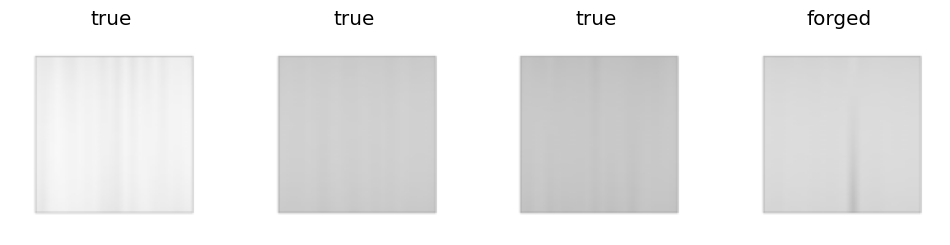

In [8]:
dls.valid.show_batch(max_n=4, nrows=1)

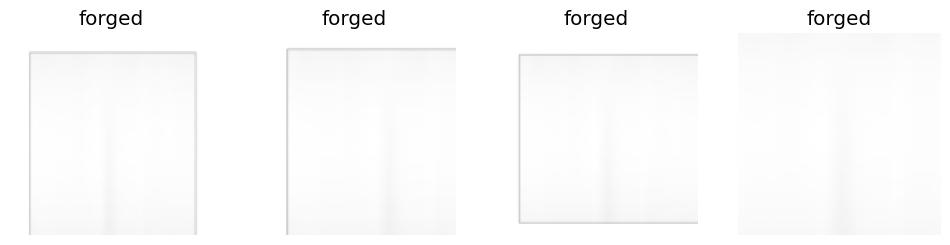

In [9]:
audioenfData = audioenfData.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = audioenfData.dataloaders(path)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

In [10]:
audioenfData = audioenfData.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = audioenfData.dataloaders(path)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
print(learn.model)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [12]:
learn.summary()

Sequential (Input shape: 64 x 3 x 224 x 224)
Layer (type)         Output Shape         Param #    Trainable 
                     64 x 64 x 112 x 112 
Conv2d                                    9408       False     
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     64 x 64 x 56 x 56   
MaxPool2d                                                      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
Conv2d                                    36864      False     
BatchNorm2d                               128        True      
ReLU                      

SuggestedLRs(valley=0.009120108559727669)

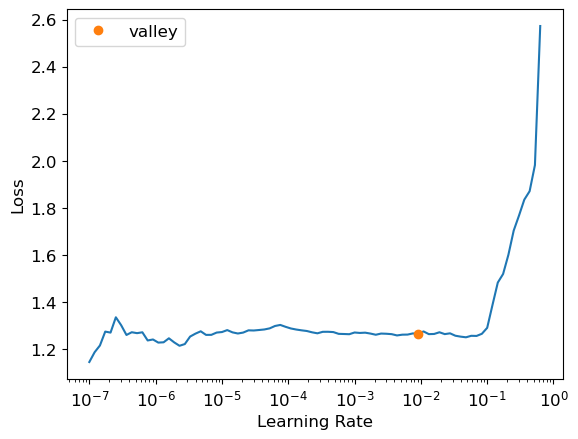

In [13]:
learn.lr_find()

In [26]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(50)

epoch,train_loss,valid_loss,error_rate,time
0,0.813511,0.675863,0.380952,07:16


epoch,train_loss,valid_loss,error_rate,time
0,0.604236,0.562610,0.315406,09:46
1,0.558733,0.529414,0.293557,09:38
2,0.541347,0.489914,0.260504,09:44
3,0.520294,0.487641,0.254342,09:38
4,0.503818,0.484724,0.262745,09:40
5,0.505795,0.463719,0.243137,09:40
6,0.496038,0.464179,0.245378,09:41
7,0.495972,0.452738,0.225770,09:42
8,0.493405,0.458135,0.251541,09:44
9,0.488722,0.437786,0.227451,09:45


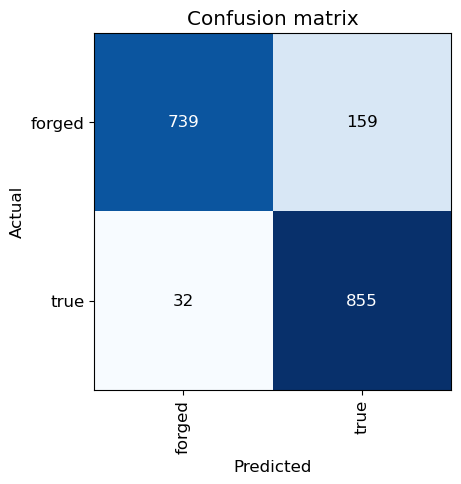

In [27]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [28]:
learn.export("20240427_truevsforged.pkl")

4464


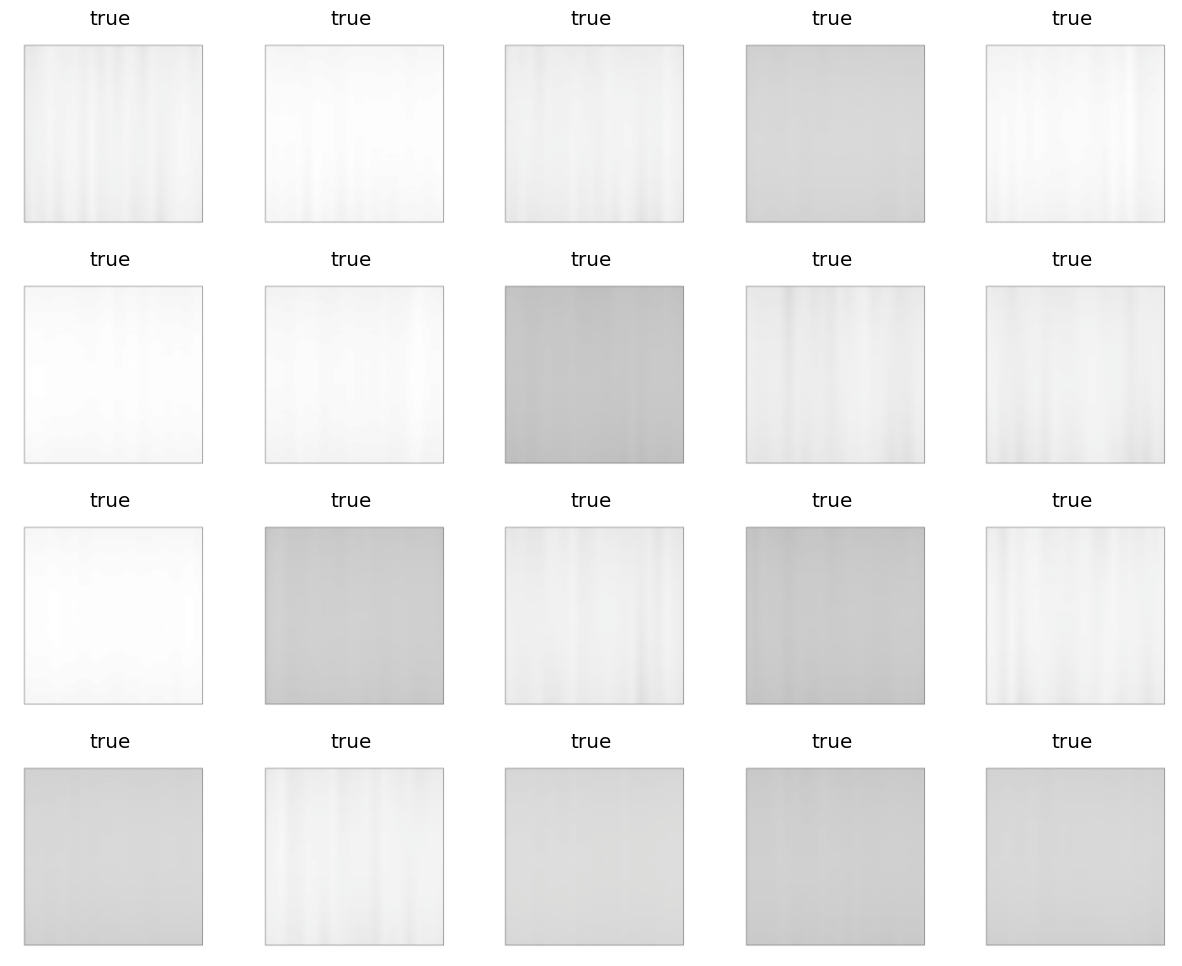

In [29]:
test_path = "./test"
test_data = get_image_files(test_path)
print(len(test_data))
tst_dl = dls.test_dl(test_data, with_labels=True)
tst_dl.show_batch(max_n=20)

In [31]:
preds, y = learn.get_preds(dl=tst_dl)
ac = accuracy(preds,y)
print(ac)

TensorBase(0.8927)


AssertionError: Torch not compiled with CUDA enabled